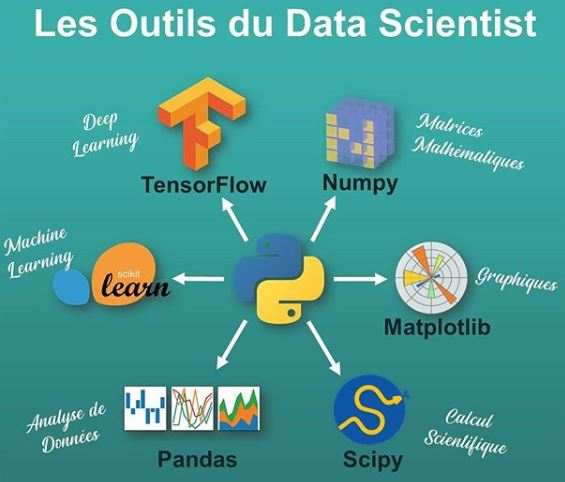

<p>Ce tutoriel python vous présente <strong>SKLEARN</strong>, le meilleur package pour faire du machine learning avec Python.<br/></p>

Nous verrons comment entraîner un <strong>modèle</strong>, <strong>l'optimiser</strong> et <strong>l'évaluer</strong> avec la bonne méthodologie. On va voir :</br>
        <ul>
             <li>Train_test_split</li>
             <li>Validation Set</li>
             <li>Cross Validation</li>
             <li>Validation Curve</li>
             <li>GridSearchCV</li>
             <li>Learning Curves</li>
        </ul>


        
<p>Avec Sklearn, on peut découper notre Dataset en <strong>Train_set</strong> et <strong>Test_set</strong> grâce a la fonction <strong>Train_test_split</strong>.</br>
Cette fonction est très importante et il faut l'utiliser pour chaque projet de machine learning, avant même de développer un modèle avec sklearn. Vous pouvez définir les proportions pour découper votre Dataset avec l'argument test_size.</br></p>

Une fois train_test_split utilisé, On entraînera notre modèle et le validera en utilisant plusieurs techniques de Validation, <strong>Validation Set</strong>, <strong>Cross-validation</strong>, <strong>Validation Curve</strong>.Puis viendra l'étape d'amélioration avec <strong>Grid SearchCV</strong> et <strong>Learning Curves</strong>pour savoir si notre modèle pourra encore apprendre avec plus de données.</br>

<p>Nous ferons ce tutoriel avec le dataset des <strong>fleurs d'iris</strong> de la bibliothèque sklearn. Nous importerons aussi <strong>numpy</strong> pour la manipulation de données du dataset et <strong>matplotlib</strong> pour l'affichage.</br></p>

<strong>Attention:</strong> Dans ce tutoriel chaque ligne de code ne sera pas forcement explicité, s'il peut servir de base tutoriel, je n'en serai que fier. Mais son but est de m'être en évidence mes acquisitions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Importation du dataset fleurs d'iris

(150, 4)


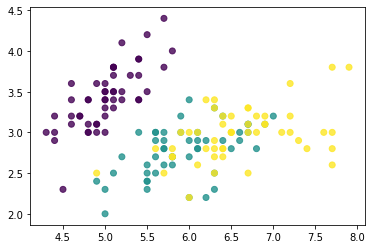

In [2]:
iris = load_iris()

x=iris.data
y=iris.target
print(x.shape)


plt.scatter(x[:,0], x[:,1], c=y, alpha=0.8)
plt.show()

<p>En machine learning, il ne faut jamais évaluer la performance d'un modèle sur les données d'entraînement.</br></p>

<p>Pourquoi? imaginons, on entraîne une machine sur des données de chats puis nous évaluons sur les mêmes photos, c'est trop facile, la machine va savoir que ceux sont des photos de chats puisqu'elle les a déjà vu. En revanche l'idéal est de tester la machine sur des données qu'elle n'a jamais vue. Ainsi on aura une idée de sa performance futur dans la vrai vie.</br></p>

Donc quand on fait du machine learning on divise toujours notre dataset on deux parties :
                    <ul>
                        <li>Un train Set dont les données sont utilisés pour entraîner le modèle</li> 
                        <li>Un test set reservé uniquement à l'évaluation du modèle</li>
                    </ul>
                    
<p>On générale la découpe se fait sur des proportions de 80 pourcent pour le train_set et 20 pourcent pour le test_set.</p>

# Division du dataset en 2 parties Train_test  et test_set 

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=5)
print('train set:', x_train.shape)
print('test set:', x_test.shape )

train set: (120, 4)
test set: (30, 4)


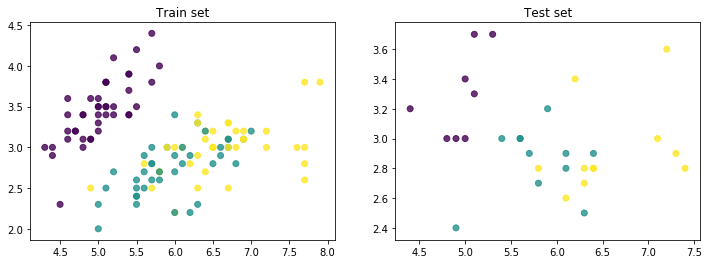

In [6]:

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')
plt.show()

#### Observations:

<p>Nous avons definit notre dataset avec la fonction train_test_split, Test_size=0.2 indique que les données du test_set seront de 20 pourcent et par déduction, 80 pourcent train_set.</br></p>

<p>Chaque fois que l'on exécute notre programme sans spécifier random_state, on obtiendra un résultat différent, c'est le comportement attendu.</br></p>

la proportion des données ne changera pas mais la représentation visuelle de notre Train set et Test set changera. il suffit juste de mettre n'importe quelle valeur numérique pour la fixer.

# Entrainement du model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
modèle= KNeighborsClassifier(n_neighbors=1)
modèle.fit(x_train, y_train)
print('Train score:', modèle.score(x_train, y_train))

Train score: 1.0


In [10]:
print('Test score:', modèle.score(x_test, y_test))

Test score: 0.9


#### Observations:

<p>Nous avons crée un modèle de KNeighborsClassifier en fixant le nombre de voisin à 1, valeur prise de façon arbitraire (nous verrons par la suite comment choisir la bonne valeur). Puis nous entraînons notre modèle en faisons passer nos données x_train et y_train dans la méthode fit. Enfin nous l'évaluons avec la méthode score.</br></p>

<p>Nous obtenons un score de 100 pourcent, c'est normal nous l'avons déjà expliqué plus haut. Nous avons évalué notre modèle (Modèle.score), entraîner notre (modèle.fit) avec les mêmes données (x_Train et y_Train).</br></p>

<p>Nous devons plutôt évaluer notre modèle avec les données jamais vue, càd que la machine n'a pas entraînée. x_test et y_test (les 20 pourcent restant de notre dataset divisé). On obtient un score de 90 pourcent.</br></p>

<p>Notre modèle réussira à peu près 90 pourcent de ses prédictions.
Mais nous pouvons encore amélioré notre modèle, ou du moins nous pouvons savoir s'il est possible de l'améliorer encore ou non.</br></p>

C'est ce que nous verrons par la suite.

# Validation Set (Amélioreration du modèle en reglant les Hyper_paramêtres)

<p>Comme pour le train_set nous ne pouvons pas améliorer notre modèle avec les données du test_set.</p>  

<p>On doit pour cela diviser le dataset originel en 3 parties :train_set, test_set et val_set.</br>
Les hyper_parametres: c'est un peu comme ci on tournait le bouton d'une radio pour trouver le meilleur signal.</br></p>

Dans la création de notre modèle la valeur du paramètre est n_neighbor=1.</br>
L'objectif ici est de savoir pour quelle valeur de n_neighbor (nombre de voisin) nous aurons une prédiction optimale de notre modèle.

<p>Quand on veut comparer 2 modèles de machines learning, par exemple KNeighborsClassifier(k) avec k=3 et k=6, on va commencer par entrainer ces deux modèles sur le train set puis on selectionera celui qui aura la meilleur performance sur le Validation set, ensuite on pourra evaluer le modèle choisi sur le Test set afin d'avoir une idée de sa performance dans la vrai vie. (voir image ci-dessous).</p>

<p>![train_set1.JPG](attachment:train_set1.JPG)</p>

<p>Mais rien ne nous dit que la façon dont on découpe le dataset est la bonne. Si ça se trouve en entraînant et en validant nos deux modèles sur une autre proportion des données (au lieu de 70/20/10, on divise en 50/10/40 ou 35/50/15 etc.), il est possible de découvrir que le modèle B est le meileur. Face à cette situation il existe une solution, c'est la Cross Validation.</p>

La cross validation consiste à entraîner puis valider notre modèle sur plusieurs découpes possibles du train set. par exemple en découpant le train set en 5 parties on peut entraîner le modèle sur les 4 premières parties et le valider sur la 5ème partie, ensuite on va refaire tous ça sur toutes les configurations possibles. Au final en fera la moyenne des 5 scores que l'on obtient et ainsi lorqu'on voudra comparer deux modèle alors on sera sur de prendre celui qui à en moyenne les meilleurs performances.

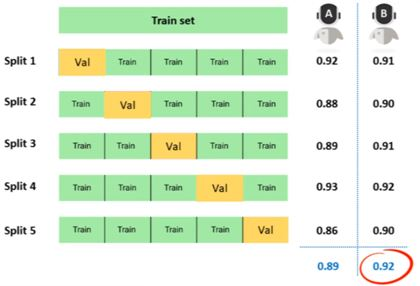

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring='accuracy')

array([0.96      , 1.        , 1.        , 0.95833333, 0.95454545])

On obtient 5 scores, pour nos 5 splits validations. On peut donc en faire la moyenne.

In [13]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5, scoring='accuracy').mean()

0.9745757575757577

Desormais on peut evaluer différent modèle pour ne retenir que celle qui à la meilleur performance.

In [14]:
cross_val_score(KNeighborsClassifier(8), x_train, y_train, cv=5, scoring='accuracy').mean() # k=8

0.9662424242424243

Pour nous éviter de taper à la même toutes les valeurs de n_neighbor (k), nous allons créer une boucle For en enregistrant chaque score que l'on obtient dans une liste pour des valeurs N(1,50).


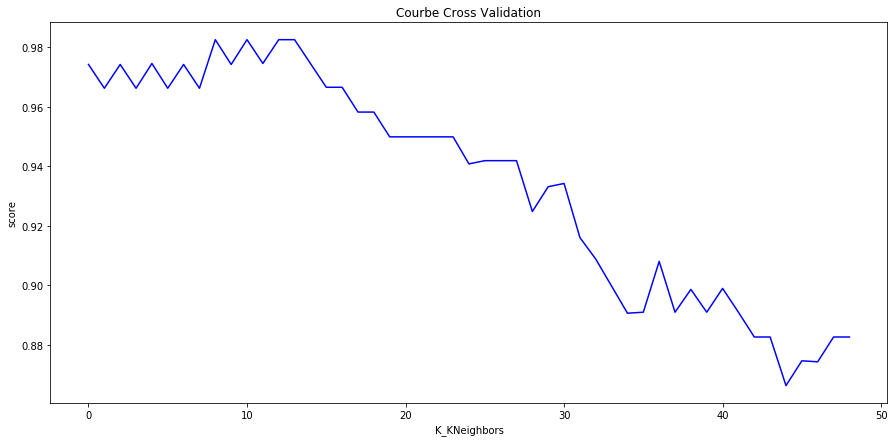

In [15]:

Val_score=[]
for k in range(1,50):
    score= cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=5, scoring='accuracy').mean()
    Val_score.append(score)
    
plt.figure(figsize=(15,7))
plt.plot(Val_score, color='b')
plt.xlabel('K_KNeighbors')
plt.ylabel('score')
plt.title('Courbe Cross Validation')
plt.show()


#### Observations 

Donc on peut voir que l'on obtiendra les meilleurs performances quand on aura des nombres de voisins aux alentours de 10

<p>Cette boucle for, on y était même pas obligé de l'écrire parce qu'il existe une fonction de sklearn qui nous permet de générer ce genre de graphique. C'est la fonction validation Curve.</p>

# Validation Curve

<p>On crée notre modèle, Ensuite on indique dans une chaine de caractère le nom de l'hyper_paramètre que l'on souhaite régler 'n_neighbors', puis on va désigner les differentes valeurs que l'on veut tester pour ce hyper-paramètre (k), pour finir on  précise le nombre de découpe avec cv=5.</p>

L'avantage avec le validation curve, c'est que l'on aura tous les scores pour le train_set et pour le Validation set. On pourra ainsi constater que l'on obtient exactement la même courbe du val_score qu'avec notre boucle for précédemment.

In [16]:
from sklearn.model_selection import validation_curve

In [17]:
model= KNeighborsClassifier()
k=np.arange(1,50)
train_score, Val_score=validation_curve(model, x_train, y_train, 'n_neighbors',k, cv=5)
Val_score.shape

(49, 5)

In [18]:
Val_score.mean(axis=1)

array([0.97424242, 0.96624242, 0.97424242, 0.96624242, 0.97457576,
       0.96624242, 0.97424242, 0.96624242, 0.98257576, 0.97424242,
       0.98257576, 0.97457576, 0.98257576, 0.98257576, 0.97457576,
       0.96657576, 0.96657576, 0.95824242, 0.95824242, 0.94990909,
       0.94990909, 0.94990909, 0.94990909, 0.94990909, 0.94081818,
       0.94190909, 0.94190909, 0.94190909, 0.92481818, 0.93315152,
       0.93424242, 0.91606061, 0.90881818, 0.89972727, 0.89063636,
       0.8909697 , 0.90806061, 0.8909697 , 0.89863636, 0.8909697 ,
       0.8989697 , 0.8909697 , 0.88263636, 0.88263636, 0.86630303,
       0.87463636, 0.87430303, 0.88263636, 0.88263636])

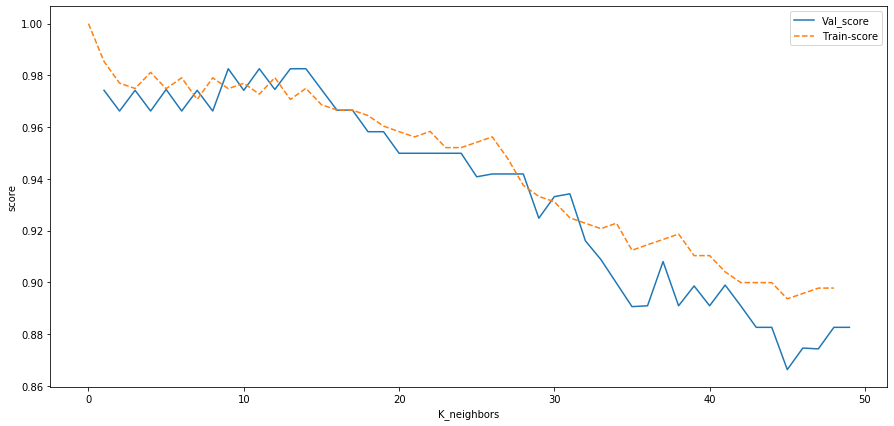

In [19]:
plt.figure(figsize=(15,7))
plt.plot(k,Val_score.mean(axis=1), label='Val_score')
plt.plot(train_score.mean(axis=1), label='Train-score', ls='--')
plt.xlabel('K_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

#### Observations:

<p>Ces deux courbes sont très utiles pour observer le phénomème d'overfiting (Quand le modèle s'est trop perfectionné sur le train set et a perdu tout sens de généralisation).</p>

<p>Lorsque l'on a un très bon score à l'entraînement mais un moins bon score à la validation.
Nous pouvons constater un semblant d'overfiting pour k proche de 0, je dirais plutôt 1 et pour k au alentour de 45 (Là où les deux courbes s'éloignent).</p>

<p>Avec ce graphique on sait desormais que l'on peut atteindre 98 pourcent de performance avec la bonne valeur pour l'hyper-paramètre n_neighbors.</p>

<p>Mais dans l'algorithme de Nearest KNeigbor il existe d'autres hyper-paramètres que n_neighbor. On a par exemple la distance de Manhattan, Euclidean, on peut aussi choisir ou non d'accorder des coéfficient à ces distances. Du coup en les réglant on peut peut-être encore avoir des meilleurs performances.</p>

Alors pour utiliser toutes ces combinaisons, le mieux c'est d'utilisé Grid searchCV.

# Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
#Création du dictionnaire
param_grid={'n_neighbors': np.arange(1,20),'metric': ['euclidean', 'manhattan']}  

In [22]:
#Fonction
grid=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5) 

In [23]:
#Entraînenemt du modele
grid.fit(x_train, y_train)

C:\Users\Yoanne\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
#Voire le modèle qui a obtenu le meilleur score
grid.best_score_ 

0.9833333333333333

In [25]:
#Meilleurs paramètres possibles
grid.best_params_ 

{'metric': 'euclidean', 'n_neighbors': 9}

In [26]:
# Sauvegarde du modèle
model=grid.best_estimator_  

In [27]:
 # "Apperçu de la performance du model dans la vrai vie"
model.score(x_test, y_test)

0.9666666666666667

#### Observations 

Nous avons dans un premier temps crée un dictionaire param_grid qui contient les hyper-paramètres à régler ainsi que chaque valeur à tester pour ces hyper-paramètre (np.arange(1,20).
Ensuite nous l'avons mis dans notre fonction, puis entraîner.


# Confusion Metrics (autre méthode pour évaluer la performance de notre modèle)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test, model.predict(x_test))

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

#### Observations:

On obtient une matrice carrée 3*3 puisque l'on n'a trois classes de fleurs dans notre dataset, on peut voir que:</br>
                        <ul>
                            <li>les 8 fleurs de la classe 1, aucune erreur</li>
                            <li>Dans la classe 2, nous avons une erreur</li>
                            <li>Dans la classe 3, aucune erreur</li>
                        </ul>


<p>C'est un metric utile pour mieux comprendre où sont les erreurs dans notre modèle.</p>

# Savoir si notre modèle peut encore mieux apprendre avec plus de données

<p>On pourrait se demander si notre modèle pourrait encore avoir des meilleurs performances si on lui fournissait encore plus de données.</br></p>

Pour répondre à cette question, il faut traçer ce que l'on appelle la courbe d'apprentissage (learning Curve).
Elle montre l'évolution des performances d'un modèle en fonction de la quantité des données qu'on lui fournit. Plus la machine à des données, meilleur sera sa performance, mais la performance finit toujours par atteindre son plafond et quand c'est le cas, c'est inutile d'avoir plus de données.</br>

<p>Donc il vaut mieux économiser son argent, arreter de collecter des données et comprendre que notre modèle ne pourra plus avoir des meilleurs performances.</p>

In [30]:
from sklearn.model_selection import learning_curve

On va entrer les quantitées de données dans train_sizes à utiliser pour l'entraînement à travers des pourcentages avec la fonction linspace de numpy. En indiquant un pourcentage de debut 0.2 de fin 1.0 ainsi qu'un nombre de lots que l'on veut avoir 5

In [31]:
# ces pourcentages nous serons retournés dans la variale N
np.linspace(0.1, 1, 5).round(1) 

array([0.1, 0.3, 0.6, 0.8, 1. ])

In [32]:
N, train_score, Vale_score=learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.1, 1, 5), cv=5)

[ 9 30 52 73 95]


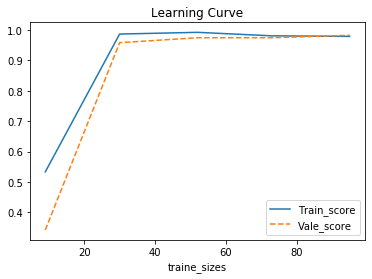

In [33]:

print(N)
plt.plot(N, train_score.mean(axis=1), label='Train_score')
plt.plot(N, Vale_score.mean(axis=1), label='Vale_score', ls='--', alpha=1)
plt.xlabel('traine_sizes')
plt.title("Learning Curve")
plt.legend()
plt.show()

#### Observations:

On peut voir que la performance n'évolue plus à partir du moment que l'on a plus de 60 points dans notre dataset.
Le modèle va continuer à stagner au-delà.

# Conclusion:

Ouffff!!!! ça y est, il été assez long à cause du texte, j'ai voulu expliquer au mieux l'utilisation de chaque fonction, chaque étape, avec les objectifs et les interprétations des résultats.
On n'a vu tout ce qu'il y'a à savoir concernant l'entraînement, l'optimisation, la validation et l'évaluation finale d'un modèle.
J'espère que vous pourriez en tirer quelque chose de mon tutoriel.


Je vous invite à aller visiter ma page Github à l'adresse ci-dessous pour voir d'autres de mes tutoriels 

https://github.com/BOUNGOTO/Travaux_Machine_learning